## Polinomal regresyon
- Bagimli degisken ile bagimsiz degiskenler arasindaki dogrusal olmayan iliskileri modellemek icin kullanilir. Bu, bagimsiz degiskenin polinomal bir fonksiyonunu kullanarak veri uzerinde bir egri olusturmayi icerir.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

In [2]:
data = pd.read_csv("experience_sale_data.csv")
data.head()

,YearsExperience,HouseSales
0,3.2,27
1,8.2,30
2,5.7,31
3,7.5,36
4,1.5,16


In [3]:
exp = "YearsExperience"
sale = "HouseSales"

In [4]:
data.describe()

,YearsExperience,HouseSales
count,15.000000,15.000000
mean,3.790000,22.666667
std,2.927346,9.802818
min,0.100000,6.000000
25%,1.250000,15.500000
50%,3.200000,22.000000
75%,6.225000,31.000000
max,8.500000,36.000000


(array([2., 2., 2., 0., 0., 2., 1., 1., 0., 0., 1., 1., 0., 1., 2.]),
 array([0.1 , 0.66, 1.22, 1.78, 2.34, 2.9 , 3.46, 4.02, 4.58, 5.14, 5.7 ,
        6.26, 6.82, 7.38, 7.94, 8.5 ]),
 <BarContainer object of 15 artists>)

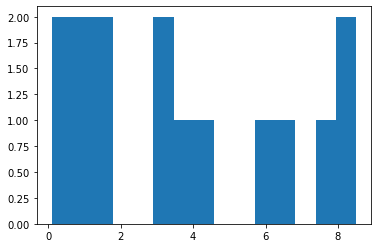

In [5]:
plt.hist(data[exp],bins=15)

<AxesSubplot:xlabel='YearsExperience', ylabel='HouseSales'>

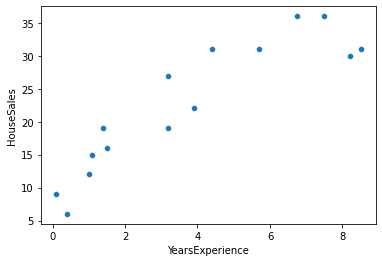

In [6]:
sbn.scatterplot(x=data[exp],y=data[sale])

In [7]:
reg = LinearRegression().fit(data[exp].values.reshape(-1,1),data[sale])

## Once lineer reg ile deneme yaptik.

In [8]:
reg.score(data[[exp]],data[[sale]])

C:\Users\menes\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


0.8137110174932514

In [9]:
print("coef -> " , reg.coef_)
print("intercept -> " , reg.intercept_)

coef ->  [3.02073001]
intercept ->  11.218099929705241


In [10]:
pred = reg.predict(data[[exp]])
pred

C:\Users\menes\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([20.88443596, 35.98808601, 28.43626099, 33.873575  , 15.74919494,
       14.54090294, 31.6080275 , 36.89430501, 20.88443596, 22.99894697,
       11.52017293, 14.23882994, 12.42639193, 24.50931197, 15.44712194])

In [11]:
r2_score_linear = r2_score(data[sale], pred)
r2_score_linear

0.8137110174932514

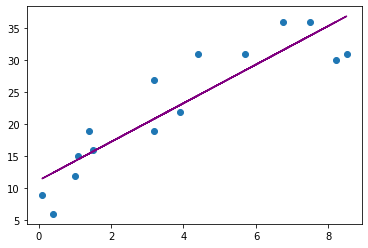

In [12]:
plt.scatter(x = data[exp], 
                y = data[sale])
plt.plot(data[exp], pred, color='purple')

In [13]:
### PolynomialFeatures(2) ile 2. derece bir denklem oldugunu belirttik.
poly_model = PolynomialFeatures(2)
tr_data = poly_model.fit_transform(data[[exp]],data[[sale]]) 
### fit_transform ile egitim ve veriler uzerinde polinomal donusum gerceklestirilir.
tr_data

array([[1.00000e+00, 3.20000e+00, 1.02400e+01],
       [1.00000e+00, 8.20000e+00, 6.72400e+01],
       [1.00000e+00, 5.70000e+00, 3.24900e+01],
       [1.00000e+00, 7.50000e+00, 5.62500e+01],
       [1.00000e+00, 1.50000e+00, 2.25000e+00],
       [1.00000e+00, 1.10000e+00, 1.21000e+00],
       [1.00000e+00, 6.75000e+00, 4.55625e+01],
       [1.00000e+00, 8.50000e+00, 7.22500e+01],
       [1.00000e+00, 3.20000e+00, 1.02400e+01],
       [1.00000e+00, 3.90000e+00, 1.52100e+01],
       [1.00000e+00, 1.00000e-01, 1.00000e-02],
       [1.00000e+00, 1.00000e+00, 1.00000e+00],
       [1.00000e+00, 4.00000e-01, 1.60000e-01],
       [1.00000e+00, 4.40000e+00, 1.93600e+01],
       [1.00000e+00, 1.40000e+00, 1.96000e+00]])

In [14]:
quadratic_model = LinearRegression().fit(tr_data, data[[sale]])

In [15]:
print("coef quadratic -> ", quadratic_model.coef_)
print("intercept quadratic -> ",quadratic_model.intercept_)

coef quadratic ->  [[ 0.          7.06439652 -0.4721974 ]]
intercept quadratic ->  [6.45196075]


In [16]:
pred_quad = quadratic_model.predict(tr_data)
pred_quad

array([[24.22272827],
       [32.62945923],
       [31.37732748],
       [32.87383106],
       [15.98611139],
       [13.65143807],
       [32.62214335],
       [32.38306922],
       [24.22272827],
       [26.82098477],
       [ 7.15367843],
       [13.04415987],
       [ 9.20216778],
       [28.39356383],
       [15.41660898]])

In [17]:
r2_score_quadratic = r2_score(data[sale], 
                              pred_quad)
r2_score_quadratic

0.9073907971182074

In [18]:
temp = []
for x in range(len(data[exp])):
    temp.append([data[exp][x],pred_quad[x]])
temp.sort(key=lambda x: x[0])

x = []
y_pred = []

for a in temp:
    x.append(a[0])
    y_pred.append(a[1])

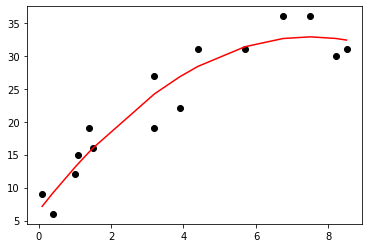

In [19]:
plt.scatter(x = data[exp],y = data[sale],color="black")

plt.plot(x,y_pred,color='red')

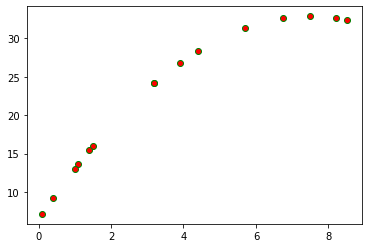

In [20]:
plt.scatter(x = data[exp], 
                y = pred_quad,color="red",edgecolors='green')

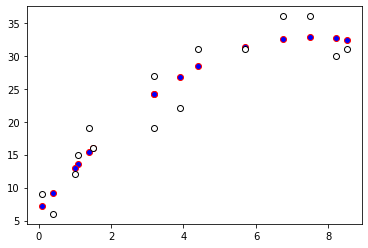

In [21]:
plt.scatter(x = data[exp], y = pred_quad,color="blue",edgecolors='red')
plt.scatter(x=data[exp],y=data[sale],color="white",edgecolors="black")